Groundwater Climate Plots

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime

In [208]:
#Import sagehen data from Dan
sgh_data = pd.read_csv('/Users/kbennett/Documents/Github/sagehen_meadows/data/station_instrumentation/climate/FieldStation_Raw/sagh_sagehen_TenMin_modified.csv')

#Change TIMESTAMP column to DatetimeIndex data type
sgh_data['TIMESTAMP'] = pd.DatetimeIndex(sgh_data.TIMESTAMP)

sgh_data   

/Users/kbennett/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (4,5,8,18,20,21,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,TIMESTAMP,RECORD,Day_of_Year,Hour,WS_ms_25ft,res_WS_ms_25ft,WindDir_25ft,SD_WindDir_25ft,WS_ms_25ft_Max,AirTC_25ft_Avg,...,PanelT_Avg,Temp_C_Avg(1),Temp_C_Avg(2),Temp_C_Avg(3),SoilCond_tc_Avg(1),SoilCond_tc_Avg(2),SoilCond_tc_Avg(3),wfv_Avg(1),wfv_Avg(2),wfv_Avg(3)
0,2018-01-14 06:00:00,3856,14,600,0.091,0.091,270.3,0.020,0.451,-3.580,...,-5.788,-273.1,-214.1,-48.05,NAN,NAN,NAN,0,0,0
1,2018-01-14 06:10:00,3857,14,610,0,0,0.0,0.000,0,-3.839,...,-5.807,-214.1,-273.1,-214.10,NAN,NAN,NAN,0,0,0
2,2018-01-14 06:20:00,3858,14,620,0.121,0.121,270.4,0.000,0.44,-3.707,...,-5.848,-214.1,-214.1,-273.10,NAN,NAN,NAN,0,0,0
3,2018-01-14 06:30:00,3859,14,630,0.073,0.073,270.4,0.027,0.401,-3.847,...,-5.882,-273.1,-273.1,-95.90,NAN,NAN,NAN,0,0,0
4,2018-01-14 06:40:00,3860,14,640,0.16,0.16,270.4,0.023,0.42,-4.076,...,-5.917,-155.0,-273.1,-273.10,NAN,NAN,NAN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126000,2020-12-17 07:00:00,157654,352,700,0,0,0.0,0.000,0,-0.821,...,-0.118,-155.0,-214.1,-273.10,NAN,NAN,NAN,0,0,0
126001,2020-12-17 07:10:00,157655,352,710,0,0,0.0,0.000,0,-0.842,...,-0.118,-214.1,-95.9,-273.10,NAN,NAN,NAN,0,0,0
126002,2020-12-17 07:20:00,157656,352,720,0,0,0.0,0.000,0,-0.914,...,-0.141,-214.1,-273.1,-214.10,NAN,NAN,NAN,0,0,0
126003,2020-12-17 07:30:00,157657,352,730,0,0,0.0,0.000,0,-0.955,...,-0.191,-214.1,-214.1,-273.10,NAN,NAN,NAN,0,0,0


In [209]:
#Import PRISM data
PRISM_data = pd.read_csv('/Users/kbennett/Documents/Github/sagehen_meadows/data/station_instrumentation/climate/PRISM_daily_interpolated/PRISM_4km_20171001_20211231_East_modified.csv')

#Change date column to DatetimeIndex data type and rename as TIMESTAMP
PRISM_data['Date'] = pd.DatetimeIndex(PRISM_data.Date)
PRISM_data.rename(columns={'Date': 'TIMESTAMP'}, inplace=True)

PRISM_data

,TIMESTAMP,ppt (inches),tmin (degrees F),tmean (degrees F),tmax (degrees F),tdmean (degrees F),vpdmin (hPa),vpdmax (hPa)
0,2017-10-01,0.00,34.2,48.8,63.4,31.3,1.07,14.30
1,2017-10-02,0.01,28.8,43.6,58.3,23.2,0.68,12.00
2,2017-10-03,0.00,25.7,39.5,53.3,18.4,1.14,10.39
3,2017-10-04,0.00,26.3,36.4,46.4,21.3,1.16,6.49
4,2017-10-05,0.00,24.0,40.0,56.0,21.5,0.72,11.46
...,...,...,...,...,...,...,...,...
1548,2021-12-27,0.46,16.6,19.7,22.7,16.3,0.27,0.61
1549,2021-12-28,0.57,18.9,21.7,24.5,18.0,0.28,0.66
1550,2021-12-29,0.04,16.9,22.0,27.1,18.5,0.32,0.80
1551,2021-12-30,0.11,17.8,23.7,29.5,21.4,0.25,0.77


In [210]:
#Take max daily temp of Sagehen data instead of max every 10 minutes
cols = sgh_data.columns.difference(['TIMESTAMP'])

sgh_data[cols] = sgh_data[cols].astype(float)
sgh_data = sgh_data.resample('d', on='TIMESTAMP').max().dropna(how='all')
sgh_data.rename(columns={'Sagehen Creek Air Temp Max degC': 'Daily Max Air Temp', 'Sagehen Creek Precipitation Geonor cm cm' : 'Daily_Precipitation'}, inplace=True)
sgh_data = sgh_data.drop('TIMESTAMP', axis=1)
sgh_data

,RECORD,Day_of_Year,Hour,WS_ms_25ft,res_WS_ms_25ft,WindDir_25ft,SD_WindDir_25ft,WS_ms_25ft_Max,AirTC_25ft_Avg,RH_25ft,...,PanelT_Avg,Temp_C_Avg(1),Temp_C_Avg(2),Temp_C_Avg(3),SoilCond_tc_Avg(1),SoilCond_tc_Avg(2),SoilCond_tc_Avg(3),wfv_Avg(1),wfv_Avg(2),wfv_Avg(3)
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2018-01-14,3963.0,14.0,2350.0,1.679,1.601,281.2,49.99,3.550,12.610,97.20,...,11.020,-95.900,22.340,70.170,NaN,NaN,NaN,0.0,0.0,0.0
2018-01-15,4107.0,15.0,2350.0,1.684,1.258,325.0,72.14,5.161,13.170,95.50,...,12.200,-95.800,-115.600,2.585,NaN,NaN,NaN,0.0,0.0,0.0
2018-01-16,4251.0,16.0,2350.0,1.447,1.180,356.0,75.46,4.110,8.320,98.10,...,10.070,-95.900,-76.180,70.190,NaN,NaN,NaN,0.0,0.0,0.0
2018-01-17,4395.0,17.0,2350.0,1.794,1.399,348.9,72.04,5.056,13.010,98.60,...,13.250,-95.900,-95.900,75.770,NaN,NaN,NaN,0.0,0.0,0.0
2018-01-18,4539.0,18.0,2350.0,3.354,2.719,357.8,75.43,12.210,8.370,98.30,...,10.670,61.740,-95.800,71.180,NaN,NaN,NaN,0.0,0.0,0.0
2018-01-19,4683.0,19.0,2350.0,0.856,0.822,272.7,58.51,2.704,0.521,98.60,...,4.189,-36.810,-95.900,-36.780,NaN,NaN,NaN,0.0,0.0,0.0
2018-01-20,4827.0,20.0,2350.0,1.529,1.468,295.6,71.82,3.205,-0.986,93.20,...,2.340,-42.400,-56.510,2.546,NaN,NaN,NaN,0.0,0.0,0.0
2018-01-21,4971.0,21.0,2350.0,1.573,1.215,353.8,75.32,6.347,1.626,90.80,...,3.463,2.628,-60.210,-17.100,NaN,NaN,NaN,0.0,0.0,0.0
2018-01-22,5115.0,22.0,2350.0,1.732,1.456,354.0,70.55,5.540,4.418,97.30,...,5.356,-95.900,-56.480,-36.790,NaN,NaN,NaN,0.0,0.0,0.0


In [211]:
#If the Sagehen precipitation data has a negative value, make it zero
sgh_data.loc[(sgh_data['Geo_inch'] < 0), 'Geo_inch'] = 0

#Make it daily precipitation instead of cumulative
precip_difference = sgh_data['Geo_inch'].diff()
sgh_data['Daily Precipitation (inches)'] = precip_difference

for i in np.arange(sgh_data.shape[0]):
    current_precip = sgh_data['Daily Precipitation (inches)'][i]
    
    #subtract previous day from current day to get current day's precipitation
    if sgh_data['Daily Precipitation (inches)'][i] >= 0:
        current_precip = sgh_data['Daily Precipitation (inches)'][i]
    else: 
        current_precip = 0
    
    sgh_data['Daily Precipitation (inches)'][i] =  current_precip
sgh_data.reset_index(inplace=True)

sgh_data.fillna(0)

,TIMESTAMP,RECORD,Day_of_Year,Hour,WS_ms_25ft,res_WS_ms_25ft,WindDir_25ft,SD_WindDir_25ft,WS_ms_25ft_Max,AirTC_25ft_Avg,...,Temp_C_Avg(1),Temp_C_Avg(2),Temp_C_Avg(3),SoilCond_tc_Avg(1),SoilCond_tc_Avg(2),SoilCond_tc_Avg(3),wfv_Avg(1),wfv_Avg(2),wfv_Avg(3),Daily Precipitation (inches)
0,2018-01-14,3963.0,14.0,2350.0,1.679,1.601,281.2,49.99,3.550,12.610,...,-95.900,22.340,70.170,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,2018-01-15,4107.0,15.0,2350.0,1.684,1.258,325.0,72.14,5.161,13.170,...,-95.800,-115.600,2.585,0.0,0.0,0.0,0.0,0.0,0.0,0.013
2,2018-01-16,4251.0,16.0,2350.0,1.447,1.180,356.0,75.46,4.110,8.320,...,-95.900,-76.180,70.190,0.0,0.0,0.0,0.0,0.0,0.0,0.046
3,2018-01-17,4395.0,17.0,2350.0,1.794,1.399,348.9,72.04,5.056,13.010,...,-95.900,-95.900,75.770,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,2018-01-18,4539.0,18.0,2350.0,3.354,2.719,357.8,75.43,12.210,8.370,...,61.740,-95.800,71.180,0.0,0.0,0.0,0.0,0.0,0.0,0.492
5,2018-01-19,4683.0,19.0,2350.0,0.856,0.822,272.7,58.51,2.704,0.521,...,-36.810,-95.900,-36.780,0.0,0.0,0.0,0.0,0.0,0.0,0.279
6,2018-01-20,4827.0,20.0,2350.0,1.529,1.468,295.6,71.82,3.205,-0.986,...,-42.400,-56.510,2.546,0.0,0.0,0.0,0.0,0.0,0.0,0.016
7,2018-01-21,4971.0,21.0,2350.0,1.573,1.215,353.8,75.32,6.347,1.626,...,2.628,-60.210,-17.100,0.0,0.0,0.0,0.0,0.0,0.0,0.000
8,2018-01-22,5115.0,22.0,2350.0,1.732,1.456,354.0,70.55,5.540,4.418,...,-95.900,-56.480,-36.790,0.0,0.0,0.0,0.0,0.0,0.0,0.083
9,2018-01-23,5259.0,23.0,2350.0,1.697,1.339,334.0,60.76,4.727,7.614,...,22.230,-42.460,134.900,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [214]:
#Import groundwater data and average groundwater data by day
#Note: 2021 data has different columns, which makes concatenation tricky
gw_data_2021 = pd.read_csv('/Users/kbennett/Documents/Github/sagehen_meadows/data/field_observations/groundwater/biweekly_manual/groundwater_biweekly_full_2021.csv')
gw_data_2018_19 = pd.read_csv('/Users/kbennett/Documents/Github/sagehen_meadows/data/field_observations/groundwater/biweekly_manual/groundwater_biweekly_full_2018-2019.csv')

gw_data = gw_data_2018_19
gw_data['timestamp'] = pd.DatetimeIndex(gw_data['timestamp'])
gw_data.rename(columns={'timestamp': 'TIMESTAMP'}, inplace=True)
cols = gw_data.columns.difference(['TIMESTAMP'])

#Got this from stack overflow
#gw_data[cols] = gw_data[cols].astype(float)
gw_data = gw_data.resample('d', on='TIMESTAMP').mean().dropna(how='all')
gw_data.rename(columns={'ground_to_water_m': 'avg ground_to_water'}, inplace=True)
gw_data.reset_index(inplace=True)
gw_data.rename(columns={"index": "TIMESTAMP"}, inplace=True)
gw_data

,TIMESTAMP,welltop_to_water_cm,water_binary,welltop_to_ground_cm,total_well_length_cm,ground_elevation_m,welltop_elevation_m,offset_cm,std_dev_cm,avg ground_to_water
0,2018-05-31,74.683056,1.000000,59.232869,154.700000,1928.717000,1929.184000,3.458750,NaN,-18.908937
1,2018-06-01,78.463775,0.952381,61.345163,147.397149,1962.747681,1961.973857,3.294048,NaN,-23.918313
2,2018-06-18,92.480694,0.923077,60.989291,147.785942,1931.872267,1931.910750,3.192692,NaN,-39.268850
3,2018-06-19,94.461061,1.000000,60.698295,145.785000,1982.555065,1983.839500,3.458750,NaN,-37.221515
4,2018-06-30,108.646736,1.000000,63.240691,147.356286,1931.872267,1931.910750,3.458750,NaN,-48.864796
5,2018-07-01,113.833088,0.944444,64.582569,147.476230,1982.404508,1983.692400,3.266597,NaN,-54.448056
6,2018-07-16,113.831373,0.894737,65.633594,147.585952,1932.090100,1931.910750,4.111316,0.211449,-54.425002
7,2018-07-17,108.182051,0.722222,60.881181,136.862659,1982.404508,1983.692400,3.063333,0.211449,-60.214375
8,2018-07-25,108.610256,0.812500,60.080518,149.614014,1932.090100,1931.910750,3.733437,0.211449,-59.612757
9,2018-07-27,105.836111,0.631579,61.183487,137.644481,1982.404508,1983.692400,2.660263,0.211449,-61.785139


In [215]:
#take 2-day average

i = 0
drop_indices = []
while i < gw_data.shape[0] - 1:
    if pd.to_datetime(gw_data['TIMESTAMP'][i+1]) == pd.to_datetime(gw_data['TIMESTAMP'][i]) + np.timedelta64(1, 'D'): 
        two_day_avg = (gw_data['avg ground_to_water'][i] + gw_data['avg ground_to_water'][i+1])/2
        gw_data['avg ground_to_water'][i+1] = two_day_avg
        drop_indices.append(i)
        i += 1
    else:
        i += 1
#reindex
gw_data = gw_data.drop(gw_data.index[drop_indices])
gw_data.reset_index(inplace=True)
gw_data = gw_data.drop('index', axis=1)
gw_data

<ipython-input-215-319ee5246e1d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gw_data['avg ground_to_water'][i+1] = two_day_avg


,TIMESTAMP,welltop_to_water_cm,water_binary,welltop_to_ground_cm,total_well_length_cm,ground_elevation_m,welltop_elevation_m,offset_cm,std_dev_cm,avg ground_to_water
0,2018-06-01,78.463775,0.952381,61.345163,147.397149,1962.747681,1961.973857,3.294048,NaN,-21.413625
1,2018-06-19,94.461061,1.000000,60.698295,145.785000,1982.555065,1983.839500,3.458750,NaN,-38.245182
2,2018-07-01,113.833088,0.944444,64.582569,147.476230,1982.404508,1983.692400,3.266597,NaN,-51.656426
3,2018-07-17,108.182051,0.722222,60.881181,136.862659,1982.404508,1983.692400,3.063333,0.211449,-57.319689
4,2018-07-25,108.610256,0.812500,60.080518,149.614014,1932.090100,1931.910750,3.733437,0.211449,-59.612757
5,2018-07-27,105.836111,0.631579,61.183487,137.644481,1982.404508,1983.692400,2.660263,0.211449,-61.785139
6,2018-08-10,109.582083,0.645161,61.979824,141.529203,1964.569599,1960.678333,2.206452,0.322749,-62.442183
7,2018-08-25,104.333333,0.785714,60.782560,134.011056,1980.215073,1983.078250,2.571429,0.322749,-58.863692
8,2018-09-16,104.361111,0.642857,60.966695,140.642731,1962.986886,1960.678333,2.185714,0.322749,-60.044360
9,2018-09-29,96.572222,0.500000,63.240691,147.356286,1931.872267,1931.910750,1.800000,0.322749,-60.172881


In [216]:
#Combine the groundwater and climate data into one dataframe

combined_PRISM_data = PRISM_data.merge(gw_data, on=['TIMESTAMP'], how='outer')
pd.set_option('display.max_rows', combined_PRISM_data.shape[0]+1)
combined_PRISM_data

,TIMESTAMP,ppt (inches),tmin (degrees F),tmean (degrees F),tmax (degrees F),tdmean (degrees F),vpdmin (hPa),vpdmax (hPa),welltop_to_water_cm,water_binary,welltop_to_ground_cm,total_well_length_cm,ground_elevation_m,welltop_elevation_m,offset_cm,std_dev_cm,avg ground_to_water
0,2017-10-01,0.00,34.2,48.8,63.4,31.3,1.07,14.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-10-02,0.01,28.8,43.6,58.3,23.2,0.68,12.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-10-03,0.00,25.7,39.5,53.3,18.4,1.14,10.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-10-04,0.00,26.3,36.4,46.4,21.3,1.16,6.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-10-05,0.00,24.0,40.0,56.0,21.5,0.72,11.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2017-10-06,0.00,26.3,43.0,59.6,20.5,1.20,13.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-10-07,0.00,29.4,49.2,68.9,23.2,1.93,19.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017-10-08,0.00,33.6,51.3,69.1,23.2,2.79,20.42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2017-10-09,0.00,30.8,42.0,53.2,18.8,2.05,8.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2017-10-10,0.00,27.7,41.1,54.6,13.8,2.03,11.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Convert units to Celsius and cm
combined_PRISM_data['tmax (deg C)'] = (combined_PRISM_data['tmax (degrees F)'] - 32) * 5 / 9
combined_PRISM_data['ppt (cm)'] = combined_PRISM_data['ppt (inches)'] * 2.54

Text(0.5, 0.98, 'Groundwater Level and Climate')

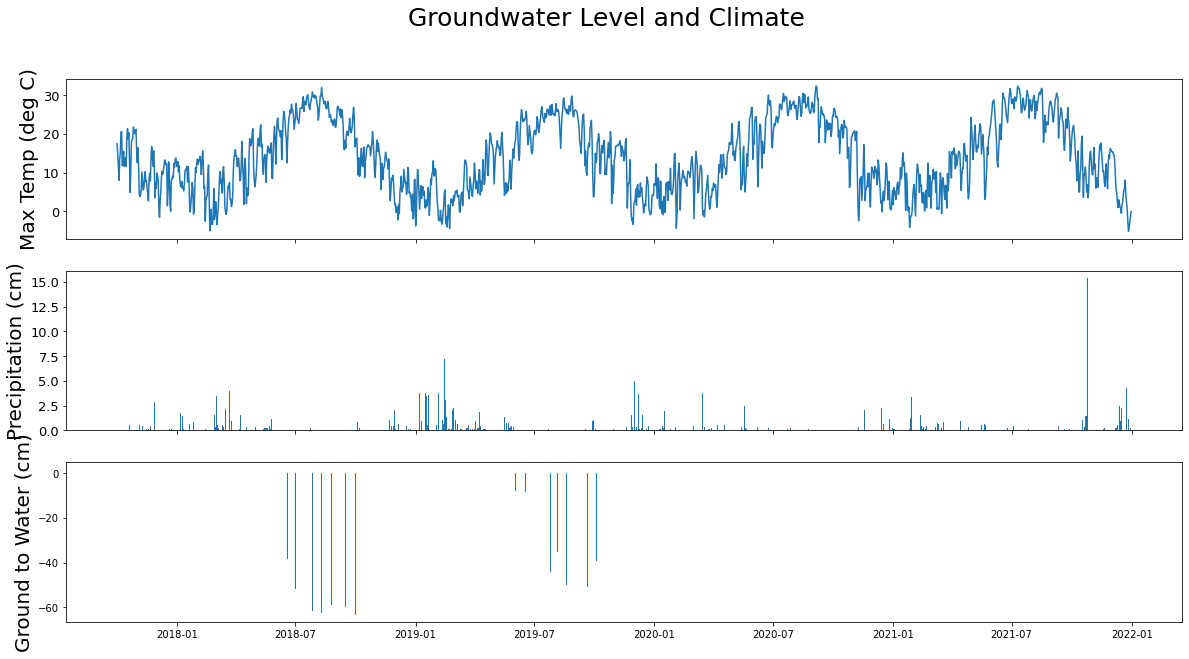

In [218]:
#PLOT
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 10), nrows=3, sharex=True)
ax1.plot(combined_PRISM_data['TIMESTAMP'], combined_PRISM_data['tmax (deg C)'])
ax1.set_ylabel('Max Temp (deg C)', size=20)
ax2.bar(combined_data['TIMESTAMP'], combined_PRISM_data['ppt (cm)'])
ax2.set_ylabel('Precipitation (cm)', size=20)
ax3.bar(combined_PRISM_data['TIMESTAMP'], combined_PRISM_data['avg ground_to_water'])
ax3.set_ylabel('Ground to Water (cm)', size=20)

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

fig.suptitle('Groundwater Level and Climate', size=25)

In [219]:
#Combine groundwater data with sagehen data
combined_sgh_data = sgh_data.merge(gw_data, on=['TIMESTAMP'], how='outer')
pd.set_option('display.max_rows', combined_sgh_data.shape[0]+1)

Text(0.5, 0.98, 'Groundwater Level and Climate')

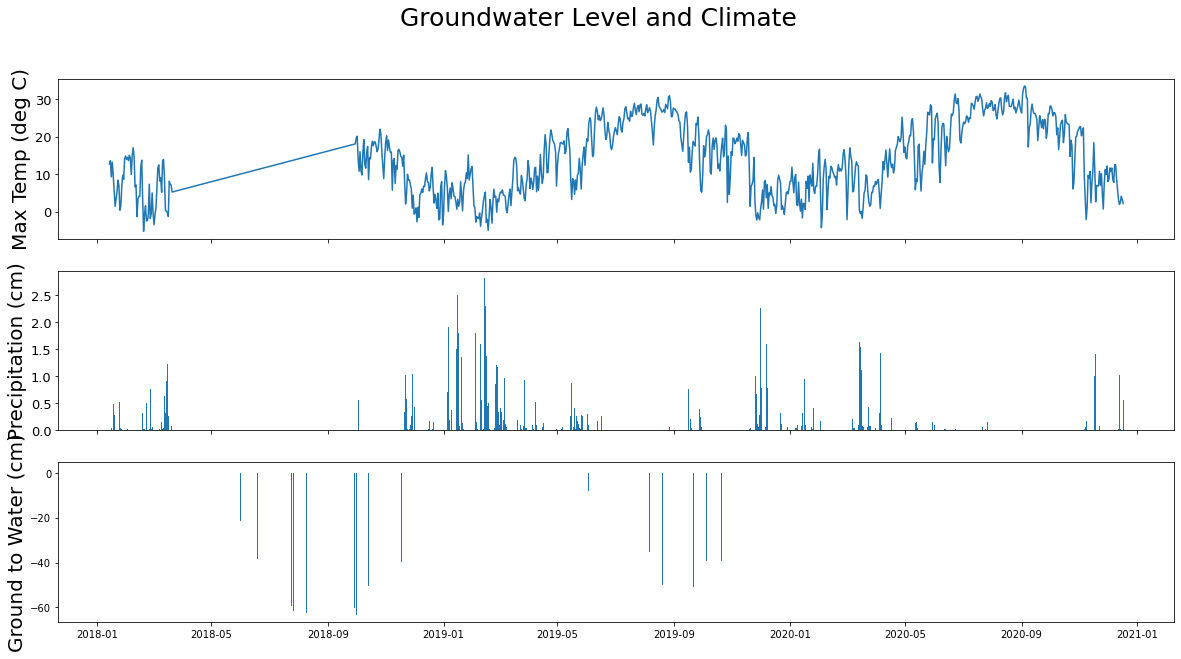

In [220]:
#PLOT
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 10), nrows=3, sharex=True)
ax1.plot(pd.to_datetime(combined_sgh_data['TIMESTAMP']), combined_sgh_data['Air_T_C_Max'])
ax1.set_ylabel('Max Temp (deg C)', size=20)
ax2.bar(pd.to_datetime(combined_sgh_data['TIMESTAMP']), combined_sgh_data['Daily Precipitation (inches)'])
ax2.set_ylabel('Precipitation (cm)', size=20)
ax3.bar(pd.to_datetime(combined_sgh_data['TIMESTAMP']), combined_sgh_data['avg ground_to_water'])
ax3.set_ylabel('Ground to Water (cm)', size=20)

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

fig.suptitle('Groundwater Level and Climate', size=25)

In [221]:
#Get Dendra temperature data
dendra_data = pd.read_csv('/Users/kbennett/Documents/Github/sagehen_meadows/data/station_instrumentation/climate/Dendra/Dendra_Sagehen_WaterYears_2015-2020.csv')

dendra_data['Time'] = pd.DatetimeIndex(dendra_data['Time'])
dendra_data.rename(columns={'Time': 'TIMESTAMP'}, inplace=True)
dendra_data = dendra_data.resample('d', on='TIMESTAMP').max().dropna(how='all')
dendra_data = dendra_data.drop('TIMESTAMP', axis=1)

combined_dendra_data = combined_sgh_data.merge(dendra_data, on=['TIMESTAMP'], how='right')
combined_dendra_data

,TIMESTAMP,RECORD,Day_of_Year,Hour,WS_ms_25ft,res_WS_ms_25ft,WindDir_25ft,SD_WindDir_25ft,WS_ms_25ft_Max,AirTC_25ft_Avg,...,avg ground_to_water,Sagehen Creek Air Temp Avg degC,Sagehen Creek Air Temp Max degC,Sagehen Creek Air Temp Min degC,Sagehen Creek Precipitation Geonor cm cm,Sagehen Creek Rainfall mm,Sagehen Creek Relative Humidity Avg %,Sagehen Creek Snow Depth in,Sagehen Creek Total Solar Radiation Avg W/m^2,Sagehen Creek Wind Speed 25 ft Avg m/s
0,2015-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.55,12.92,11.97,16.33,1.016,94.10,-12.160000,780.0,1.146
1,2015-10-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17.30,17.51,17.04,16.33,0.000,94.90,3376.000000,784.0,2.216
2,2015-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17.56,17.68,17.41,16.70,1.524,94.50,432.800000,789.0,2.474
3,2015-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.74,13.08,12.57,16.70,0.000,94.10,-24.550000,619.0,2.774
4,2015-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,17.28,17.82,17.14,16.70,0.000,94.80,308.600000,759.0,2.294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823,2020-09-27,146091.0,271.0,2350.0,3.145,2.715,292.0,64.57,6.868,18.48,...,NaN,19.45,19.62,19.14,NaN,NaN,88.60,2.537755,798.0,3.145
1824,2020-09-28,146235.0,272.0,2350.0,2.523,2.217,273.1,65.33,5.177,20.16,...,NaN,21.18,21.38,20.97,NaN,NaN,79.35,2.480942,806.0,2.523
1825,2020-09-29,146379.0,273.0,2350.0,1.667,1.440,284.1,65.43,4.183,24.20,...,NaN,25.95,26.22,25.78,NaN,NaN,74.49,2.305363,757.0,1.667
1826,2020-09-30,146523.0,274.0,2350.0,1.746,1.487,274.3,60.70,3.848,24.40,...,NaN,25.91,26.12,25.65,NaN,NaN,81.10,2.365709,697.0,1.746


Text(0.5, 0.98, 'Groundwater Level and Climate')

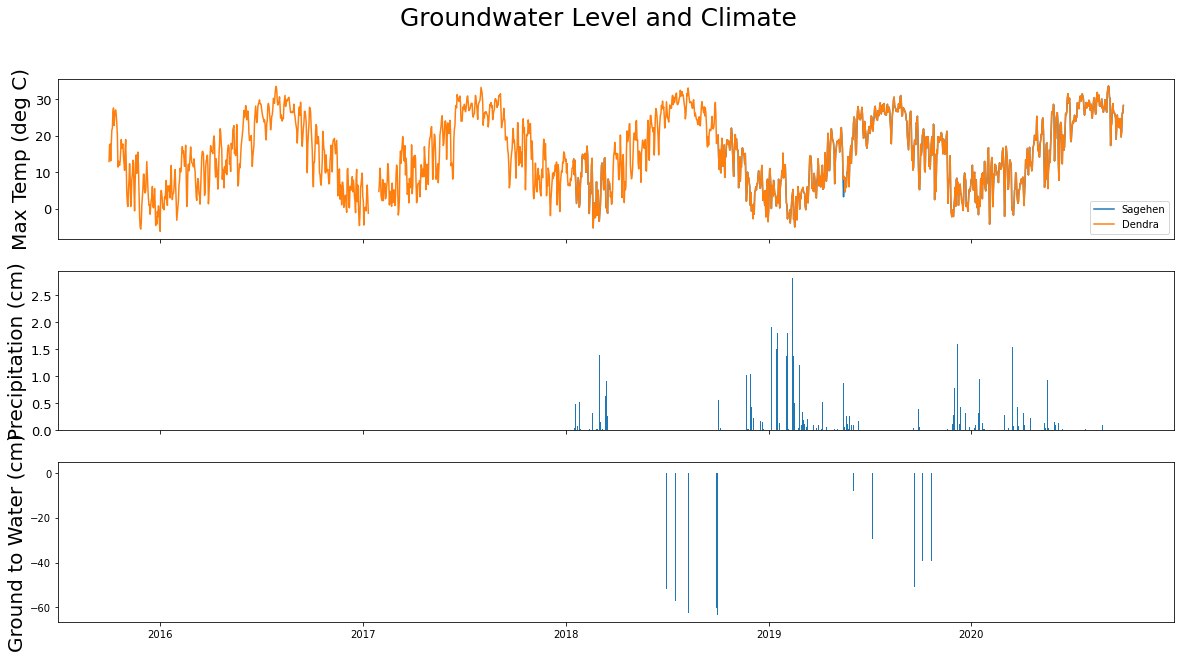

In [222]:
#Plot Dendra data with Sagehen data

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 10), nrows=3, sharex=True)
ax1.plot(pd.to_datetime(combined_dendra_data['TIMESTAMP']), combined_dendra_data['Air_T_C_Max'], label='Sagehen')
ax1.plot(pd.to_datetime(combined_dendra_data['TIMESTAMP']), combined_dendra_data['Sagehen Creek Air Temp Max degC'], label='Dendra')
ax1.set_ylabel('Max Temp (deg C)', size=20)
ax2.bar(pd.to_datetime(combined_dendra_data['TIMESTAMP']), combined_dendra_data['Daily Precipitation (inches)'])
ax2.set_ylabel('Precipitation (cm)', size=20)
ax3.bar(pd.to_datetime(combined_dendra_data['TIMESTAMP']), combined_dendra_data['avg ground_to_water'])
ax3.set_ylabel('Ground to Water (cm)', size=20)

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

ax1.legend()
fig.suptitle('Groundwater Level and Climate', size=25)

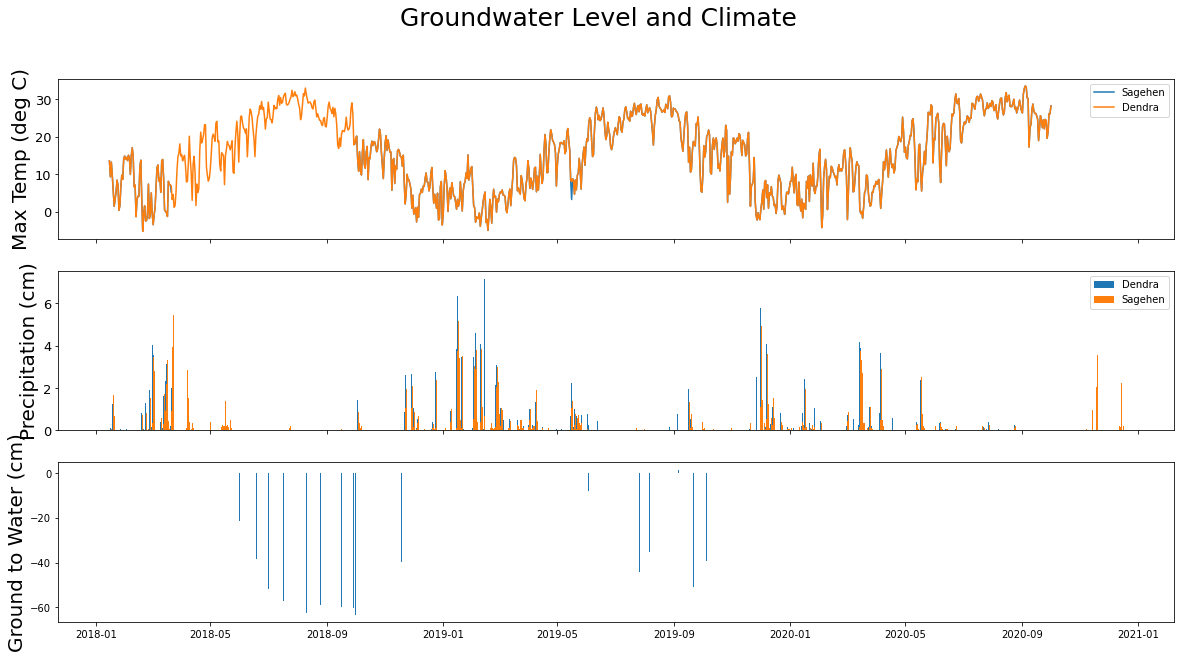

In [225]:
#Convert precipitation units to cm
combined_dendra_data['Dendra Precipitation (cm)'] = combined_dendra_data['Daily Precipitation (inches)'] * 2.54

#Cut data to desired timeframe and compare plots (Dendra and PRISM)

datelist = pd.date_range(start="2018-01-14",end="2020-12-17").to_pydatetime().tolist()
cut_combined_PRISM_data = combined_PRISM_data[(pd.DatetimeIndex(combined_PRISM_data['TIMESTAMP']).to_pydatetime() > datelist[0]) 
                                                & (pd.DatetimeIndex(combined_data['TIMESTAMP']).to_pydatetime() < datelist[len(datelist) - 1])]
cut_combined_dendra_data = combined_dendra_data[(pd.DatetimeIndex(combined_dendra_data['TIMESTAMP']).to_pydatetime() > datelist[0]) 
                                                & (pd.DatetimeIndex(combined_dendra_data['TIMESTAMP']).to_pydatetime() < datelist[len(datelist) - 1])]

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 10), nrows=3, sharex=True)
ax1.plot(pd.to_datetime(cut_combined_dendra_data['TIMESTAMP']), cut_combined_dendra_data['Air_T_C_Max'], label='Sagehen')
ax1.plot(pd.to_datetime(cut_combined_dendra_data['TIMESTAMP']), cut_combined_dendra_data['Sagehen Creek Air Temp Max degC'], label='Dendra')
#ax1.plot(cut_combined_data['TIMESTAMP'], cut_combined_data['tmax (deg C)'], label='PRISM')
ax1.set_ylabel('Max Temp (deg C)', size=20)
ax2.bar(pd.to_datetime(cut_combined_dendra_data['TIMESTAMP']), cut_combined_dendra_data['Dendra Precipitation (cm)'], label='Dendra')
ax2.bar(cut_combined_PRISM_data['TIMESTAMP'], cut_combined_PRISM_data['ppt (cm)'], label='Sagehen')
ax2.set_ylabel('Precipitation (cm)', size=20)
ax3.bar(pd.to_datetime(gw_data['TIMESTAMP']), gw_data['avg ground_to_water'])
ax3.set_ylabel('Ground to Water (cm)', size=20)

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

fig.suptitle('Groundwater Level and Climate', size=25)
ax1.legend()
ax2.legend()